# Deep Neural Networks

In [ ]:
import tensorflow        as tf
import numpy             as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 
%aimport nn_model
%aimport create_data
%aimport preprocess

## tasks

- Pietro:
    - punto 1

- Giacomo:
    - punto2

- Nicolò:
    - punto 3

- Alberto:
    - punto 4

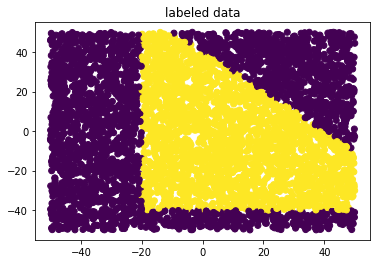

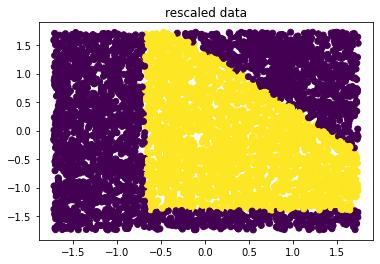

In [ ]:
# number of data
N = 5000
# box size
B = 100

# random seed for reproducibility
np.random.seed(20220307)

x = create_data.sample_data(N, B)
y = create_data.assign_label(x)

plt.scatter(x[:,0], x[:,1], c=y)
plt.title("labeled data")
plt.show()

mean = np.mean(x, axis=0)
std = np.std(x, axis=0)

# re-scaling data 
x_scaled = preprocess.standardize(x, mean, std)

plt.scatter(x_scaled[:,0], x_scaled[:,1], c=y)
plt.title("rescaled data")
plt.show()

In [ ]:
train_frac = 0.7

N_train = int(N*train_frac)

training_data, training_labels = np.copy(x_scaled[0:N_train]), np.copy(y[0:N_train])
test_data,     test_labels     = np.copy(x_scaled[N_train:]),  np.copy(y[N_train:])

print(f"Traing set :\t{training_data.shape[0]}\nTest set  :\t{test_data.shape[0]}")

N_valid = 500

x_train, y_train = np.copy(training_data[N_valid:]),  np.copy(training_labels[N_valid:])
x_valid, y_valid = np.copy(training_data[0:N_valid]), np.copy(training_labels[0:N_valid])

print(f"\nN_train :\t{x_train.shape[0]} \nN_valid :\t{x_valid.shape[0]}")

Traing set :	3500
Test set  :	1500

N_train :	3000 
N_valid :	500


In [ ]:
n_features = x.shape[1]

# NN hyperparameters
architecture      = [n_features, 20, 20, 1]
dropout_arc       = [1]
dropout_rates     = [0.2]
batch_norm_arc    = [2]   
input_dim         = architecture[0]
hidden_activation = "relu"
output_activation = "sigmoid"
name              = "my lovely neural network"

# build the NN model
network = nn_model.NN(
    input_dim         = input_dim,
    architecture      = architecture,
    dropout_layers    = dropout_arc,
    dropout_rates     = dropout_rates,
    batch_norm_layers = batch_norm_arc,
    hidden_activation = hidden_activation,
    output_activation = output_activation,
    nn_name           = name,
)

# print summary
network.summary()

# compile NN with loss, optimizer and metrics
loss      = "binary_crossentropy"
optimizer = "adam"
metrics   = ["accuracy"]

network.compile(
    loss      = loss,
    optimizer = optimizer,
    metrics   = metrics,
)

Model: "my lovely neural network"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 input_layer (InputLayer)                    [(None, 2)]                             0              
                                                                                                    
 hidden_0 (Dense)                            (None, 20)                              60             
                                                                                                    
 dropout_0 (Dropout)                         (None, 20)                              0              
                                                                                                    
 batch_norm_1 (BatchNormalization)           (None, 20)                              80             
                                                         

In [ ]:
minibatch = 100
N_epochs  = 300

fit = network.fit(
    x_train, y_train,
    epochs          = N_epochs,
    batch_size      = minibatch,
    validation_data = (x_valid, y_valid),
    verbose         = 0,
)

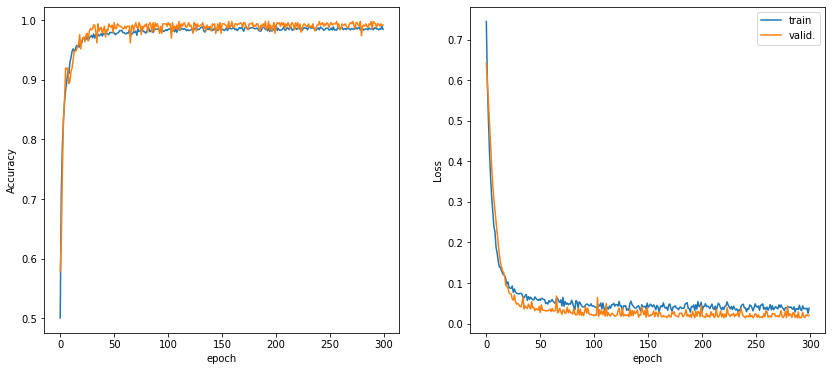

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

ax[0].plot(fit.history['accuracy'],label="train")
ax[0].plot(fit.history['val_accuracy'],label="valid.")
ax[0].set_xlabel('epoch')
ax[0].set_ylabel("Accuracy")

ax[1].plot(fit.history['loss'],label="train")
ax[1].plot(fit.history['val_loss'],label="valid.")
ax[1].set_xlabel('epoch')
ax[1].set_ylabel("Loss")
ax[1].legend()

plt.show()

In [ ]:
test = network.evaluate(
    test_data, test_labels,
    batch_size      = minibatch,
    verbose         = 0,
)

print("test loss, test acc:", test)


test loss, test acc: [0.024195265024900436, 0.9879999756813049]


In [ ]:
dx = 2
xgrid = np.arange(x.min(),x.max()+dx, dx)
l_grid = xgrid.shape[0]
grid = np.zeros((l_grid*l_grid, 2))

k=0
for i in range(l_grid):
    for j in range(l_grid):
        grid[k,:] = (xgrid[j], xgrid[i])
        k=k+1

In [ ]:
grid_scaled = preprocess.standardize(grid, np.mean(grid, axis=0), np.std(grid, axis=0))
pred        = network.predict(grid_scaled)

# if pred-label > 0.5 ==> pred-label==1
pred_binary = pred.copy()
pred_binary[pred <= 0.5] = 0
pred_binary[pred >  0.5] = 1

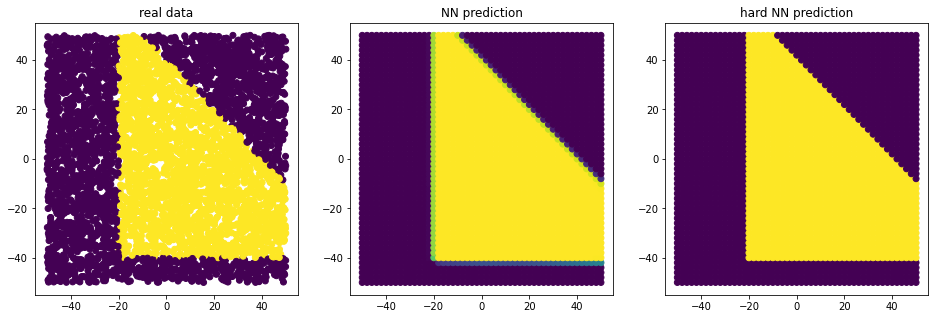

In [ ]:
def boundaries(ax):    
    ax.plot((-20,-20),(-40,50), color="white", lw=2)
    ax.plot((-20,50), (-40,-40),color="white", lw=2)
    ax.plot((-10,50), (50,-10), color="white", lw=2)
    
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(16,5))

# real data
ax[0].scatter(x[:,0], x[:,1], c=y)
ax[0].set_title("real data")

# NN prediction
ax[1].scatter(grid[:,0], grid[:,1], c=pred)
ax[1].set_title("NN prediction")

# hard NN prediction
ax[2].scatter(grid[:,0], grid[:,1], c=pred_binary)
ax[2].set_title("hard NN prediction")

plt.show()

## 1)  Study the performance of the DNN when the number N of samples is

a) reduced

b) increased

c) augmented

### 1.a


In [ ]:
# number of data
N = 5000
# box size
B = 100

# random seed for reproducibility
np.random.seed(20220307)

x = create_data.sample_data(N, B)
# y = create_data.assign_label(x)

mean = np.mean(x, axis=0)
std = np.std(x, axis=0)

# re-scaling data 
x_scaled = preprocess.standardize(x, mean, std)

In [ ]:
reduction_rates = [1.0, 0.8, 0.6, 0.4, 0.2]

N = 5000
B = 100

x = create_data.sample_data(N, B)

training_data,   test_data   = [], []
training_labels, test_labels = [], []
x_valid, y_valid = [], []

N_red = [N*rate for rate in reduction_rates]
m_train_red = []

# for tr_rate in reduction_rates:
for N_i in N_red:

    # N = int(N*tr_rate)
    N_train = int(N_i*train_frac)
    N_valid = int(N_train * 0.3) 
    m_train_red.append(N_train)

    permutation = np.random.permutation(N) # random permutation
    x = x[permutation]
    x_scaled = preprocess.standardize(x, mean, std)
    
    training_data.append((x_scaled[N_valid:N_train]) )
    training_labels.append( create_data.assign_label(x[N_valid:N_train]) )

    test_data.append((x_scaled[N_train:]) )
    test_labels.append(create_data.assign_label(x[N_train:]) )

    x_valid.append(x_scaled[0:N_valid]) 
    y_valid.append(create_data.assign_label(x[0:N_valid])) 

print(m_train_red)    

[3500, 2800, 2100, 1400, 700]


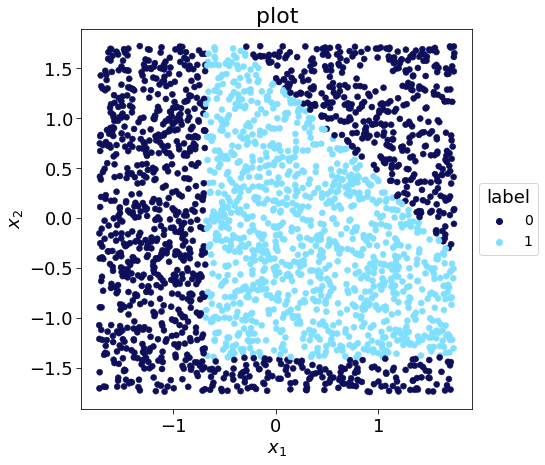

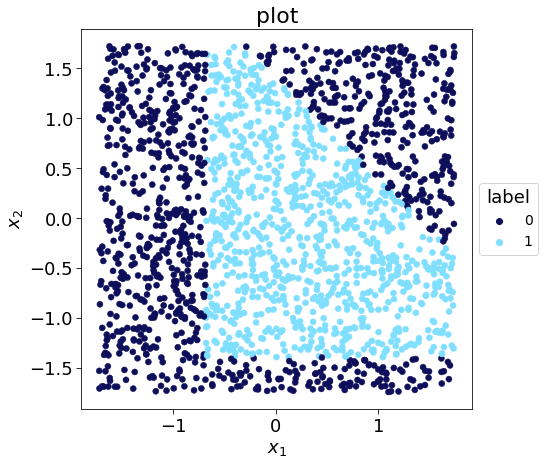

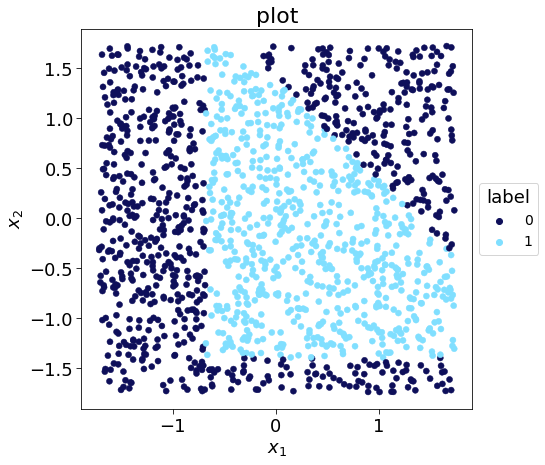

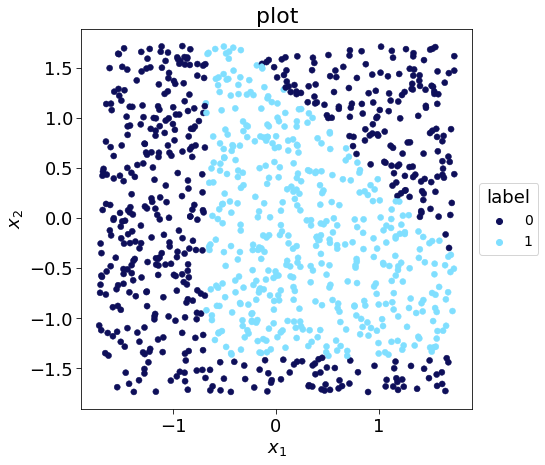

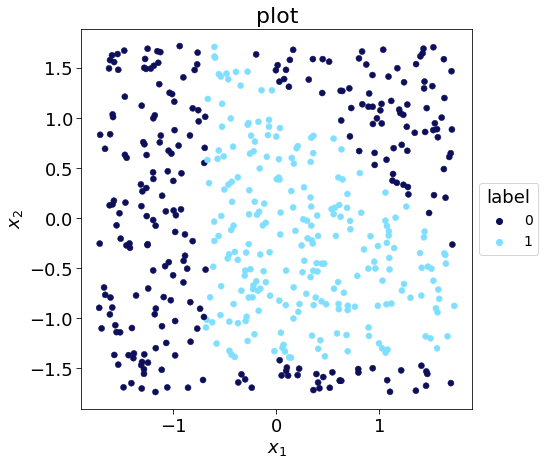

In [ ]:
from plot_utils import plot_labeled_data

for data, labels, rate in zip(training_data, training_labels, reduction_rates):
    fig = plt.figure(figsize=(7,7))
    ax = plot_labeled_data(data, labels, fig)
    plt.show()


In [ ]:
n_features = x.shape[1]

# NN hyperparameters
architecture      = [n_features, 20, 20, 1]
dropout_arc       = [1]
dropout_rates     = [0.2]
batch_norm_arc    = [2]   
input_dim         = architecture[0]
hidden_activation = "relu"
output_activation = "sigmoid"
name              = "my lovely neural network"

# build the NN model
network = nn_model.NN(
    input_dim         = input_dim,
    architecture      = architecture,
    dropout_layers    = dropout_arc,
    dropout_rates     = dropout_rates,
    batch_norm_layers = batch_norm_arc,
    hidden_activation = hidden_activation,
    output_activation = output_activation,
    nn_name           = name,
)

# print summary
network.summary()

# compile NN with loss, optimizer and metrics
loss      = "binary_crossentropy"
optimizer = "adam"
metrics   = ["accuracy"]

network.compile(
    loss      = loss,
    optimizer = optimizer,
    metrics   = metrics,
)

Model: "my lovely neural network"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 input_layer (InputLayer)                    [(None, 2)]                             0              
                                                                                                    
 hidden_0 (Dense)                            (None, 20)                              60             
                                                                                                    
 dropout_0 (Dropout)                         (None, 20)                              0              
                                                                                                    
 batch_norm_1 (BatchNormalization)           (None, 20)                              80             
                                                         

In [ ]:
#training 

minibatch = 100
N_epochs  = 300

tr_acc_red, val_acc_red = [], []
tr_loss_red, val_loss_red = [], []
test_loss_red, test_acc_red = [], []

for x_tr, y_tr, x_val, y_val, x_test, y_test in zip(training_data, training_labels, x_valid, y_valid, test_data, test_labels):
    network = nn_model.NN(
    input_dim         = input_dim,
    architecture      = architecture,
    dropout_layers    = dropout_arc,
    dropout_rates     = dropout_rates,
    batch_norm_layers = batch_norm_arc,
    hidden_activation = hidden_activation,
    output_activation = output_activation,
    nn_name           = name,
    )

    network.compile(
        loss      = loss,
        optimizer = optimizer,
        metrics   = metrics,
        )


    fit = network.fit(
        x_tr, y_tr,
        epochs          = N_epochs,
        batch_size      = minibatch,
        validation_data = (x_val, y_val),
        verbose         = 0,
    )

    tr_acc_red.append(fit.history['accuracy'])
    val_acc_red.append(fit.history['val_accuracy'])
    tr_loss_red.append(fit.history['loss'])
    val_loss_red.append(fit.history['val_loss'])

    test = network.evaluate(
        x_test, y_test,
        batch_size      = minibatch,
        verbose         = 0,
        )
    print(test)
    test_loss_red.append(test[0])
    test_acc_red.append(test[1])


[0.023921584710478783, 0.9900000095367432]
[0.01898643560707569, 0.9931818246841431]
[0.01706675998866558, 0.9965517520904541]
[0.020865609869360924, 0.9950000047683716]
[0.035425037145614624, 0.9855813980102539]


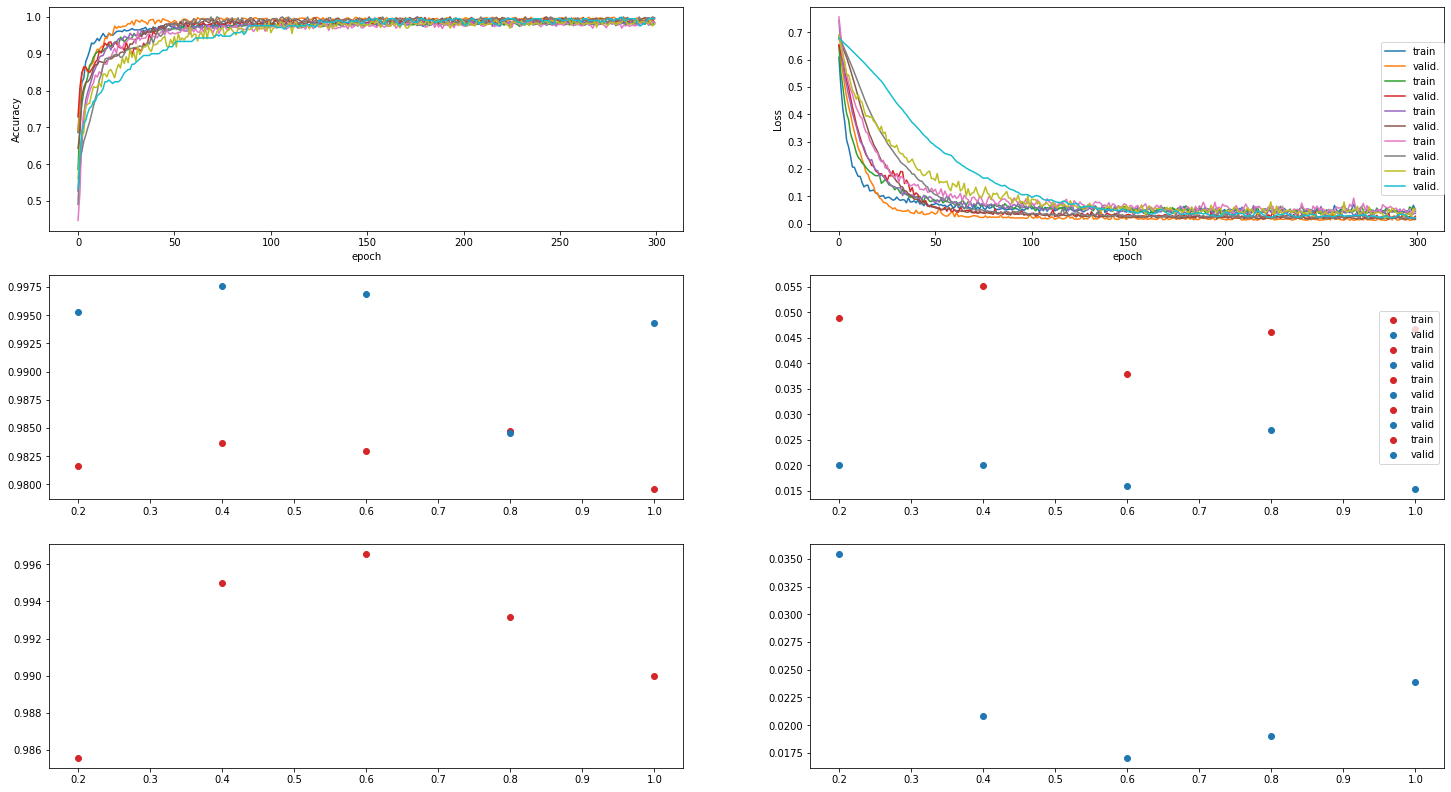

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(25,14))
ax[0,0].set_xlabel('epoch'); ax[0,0].set_ylabel("Accuracy")
ax[0,1].set_xlabel('epoch'); ax[0,1].set_ylabel("Loss"); 
ax[1,0].set_xlabel('reducting rates'); ax[1,0].set_ylabel("Train/Valid Accuracy")
ax[1,1].set_xlabel('reducting'); ax[1,1].set_ylabel("Train/Valid Loss") 
ax[2,0].set_xlabel('reducting rates'); ax[2,0].set_ylabel("Test Accuracy")
ax[2,1].set_xlabel('reducting'); ax[2,1].set_ylabel("Test Loss") 

for acc,val, rate in zip(tr_acc_red, val_acc_red, reduction_rates):
    ax[0,0].plot(acc,label="train")
    ax[0,0].plot(val,label="valid.")
    
    ax[1,0].scatter(rate,acc[-1],label="train",color='tab:red')
    ax[1,0].scatter(rate,val[-1],label="valid",color='tab:blue')


for acc,val,rate in zip(tr_loss_red, val_loss_red,reduction_rates):
    ax[0,1].plot(acc,label="train")
    ax[0,1].plot(val,label="valid.")
    
    ax[1,1].scatter(rate,acc[-1],label="train", color='tab:red')
    ax[1,1].scatter(rate,val[-1],label="valid", color='tab:blue')

for acc,val,rate in zip(test_acc_red, test_loss_red, reduction_rates):
    ax[2,0].scatter(rate,acc,label="test_acc", color='tab:red')
    ax[2,1].scatter(rate,val,label="test_loss", color='tab:blue')

ax[0,1].legend(loc='center right',borderaxespad=0)
ax[1,1].legend(loc='center right')
plt.show()

### 1b) more data



In [ ]:
N = 5000
increasing_rates = [1.0, 1.25, 1.50, 1.75, 2.0, 2.25] #ogni volta aggiungo il 25% di N di dati
N_inc = [int(N*i) for i in increasing_rates]

x_training,  x_test = [], []
y_training, y_test = [], []
x_valid, y_valid = [], []
m_train_inc=[]
# i=0
# for rate in increasing_rates:
for N_i in N_inc:
    # N = int(N*rate)
    N_train = int(N_i * train_frac)
    N_valid = int(N_train * 0.3)
    m_train_inc.append(N_train)

    x = create_data.sample_data(N_i, B)
    mean = np.mean(x, axis=0)
    std = np.std(x, axis=0)

    x_scaled = preprocess.standardize(x, mean, std)
    
    x_training.append((x_scaled[N_valid:N_train]) )
    y_training.append( create_data.assign_label(x[N_valid:N_train]) )

    x_test.append((x_scaled[N_train:]) )
    y_test.append(create_data.assign_label(x[N_train:]) )

    x_valid.append(x_scaled[0:N_valid]) 
    y_valid.append(create_data.assign_label(x[0:N_valid])) 

    # print(f'training size {len(x_training[i])}, {len(y_training[i])}')
    # print(f'val {len(x_valid[i])},{len(y_valid[i])}')
    # print(f'test {len(x_test[i])},{len(y_test[i])}')
    # i+=1

print(m_train_inc)

[3500, 4375, 5250, 6125, 7000, 7874]


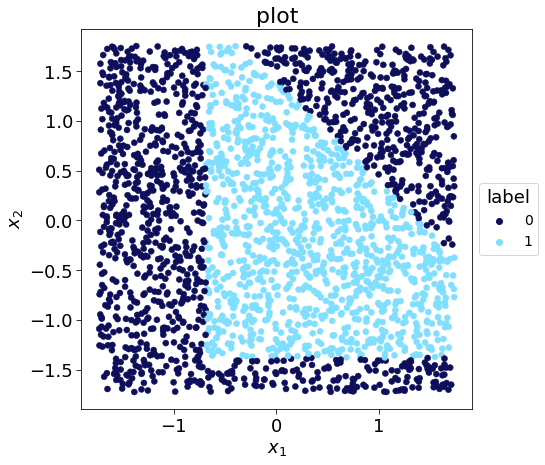

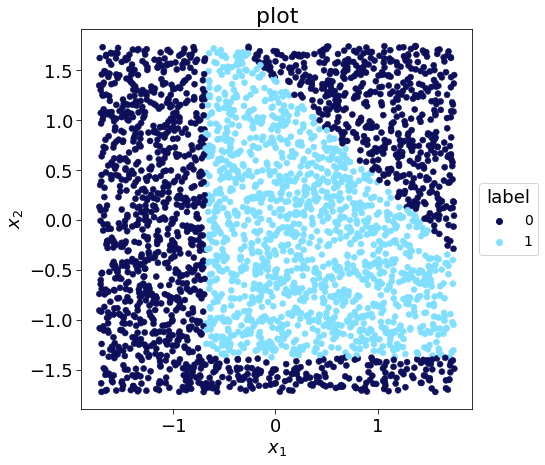

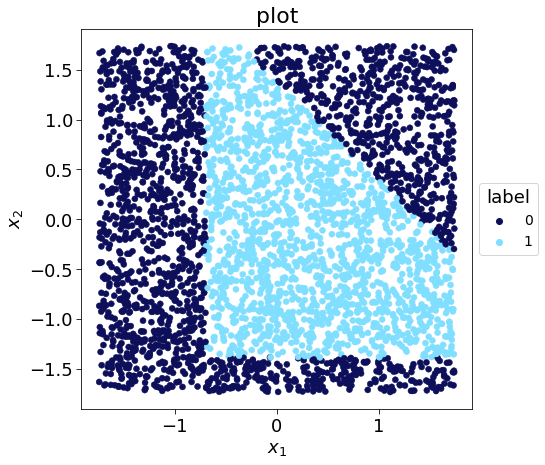

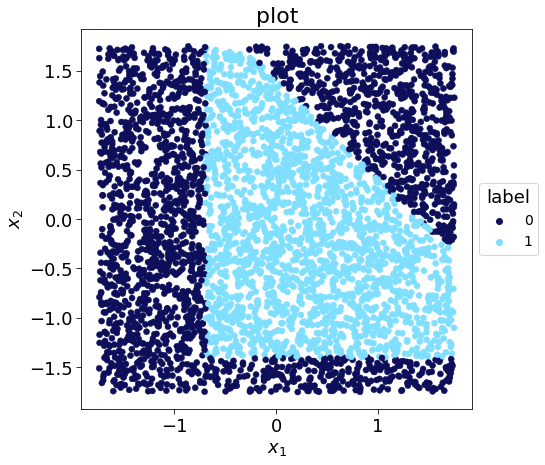

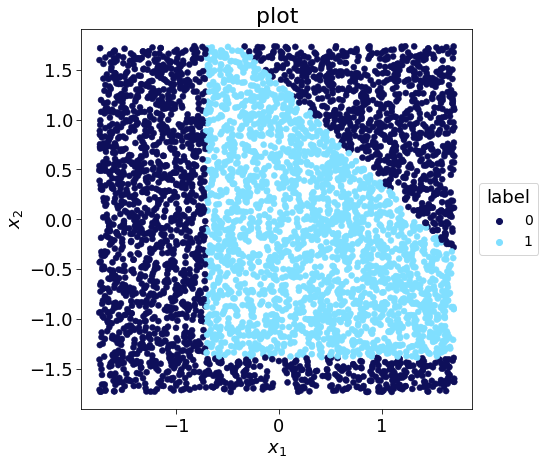

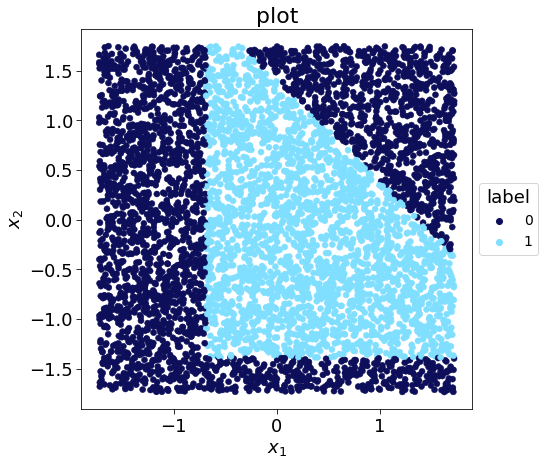

In [ ]:
for data, labels in zip(x_training, y_training):
    fig = plt.figure(figsize=(7,7))
    ax = plot_labeled_data(data, labels, fig)
plt.show()

In [ ]:
#training 

minibatch = 100
N_epochs  = 300

tr_acc_inc, val_acc_inc = [], []
tr_loss_inc, val_loss_inc = [], []
test_loss_inc, test_acc_inc = [], []

for x_tr, y_tr, x_val, y_val, x_ts, y_ts in zip(x_training, y_training, x_valid, y_valid, x_test, y_test):

    network = nn_model.NN(
    input_dim         = input_dim,
    architecture      = architecture,
    dropout_layers    = dropout_arc,
    dropout_rates     = dropout_rates,
    batch_norm_layers = batch_norm_arc,
    hidden_activation = hidden_activation,
    output_activation = output_activation,
    nn_name           = name,
    )

    network.compile(
        loss      = loss,
        optimizer = optimizer,
        metrics   = metrics,
        )

    fit = network.fit(
        x_tr, y_tr,
        epochs          = N_epochs,
        batch_size      = minibatch,
        validation_data = (x_val, y_val),
        verbose         = 0,
    )
    #taking only the final value of accuracy and loss
    # tr_acc.append(fit.history['accuracy'][-1])
    # val_acc.append(fit.history['val_accuracy'][-1])
    # tr_loss.append(fit.history['loss'][-1])
    # val_loss.append(fit.history['val_loss'][-1])
    
    tr_acc_inc.append(fit.history['accuracy'])
    val_acc_inc.append(fit.history['val_accuracy'])
    tr_loss_inc.append(fit.history['loss'])
    val_loss_inc.append(fit.history['val_loss'])
    
    test = network.evaluate(
        x_ts, y_ts,
        batch_size      = minibatch,
        verbose         = 0,
        )
    print(test)
    test_loss_inc.append(test[0])
    test_acc_inc.append(test[1])

[0.02372553199529648, 0.9913333058357239]
[0.014778504148125648, 0.995199978351593]
[0.021365731954574585, 0.9915555715560913]
[0.016552897170186043, 0.9946666955947876]
[0.012208123691380024, 0.9976666569709778]
[0.017824525013566017, 0.9952606558799744]


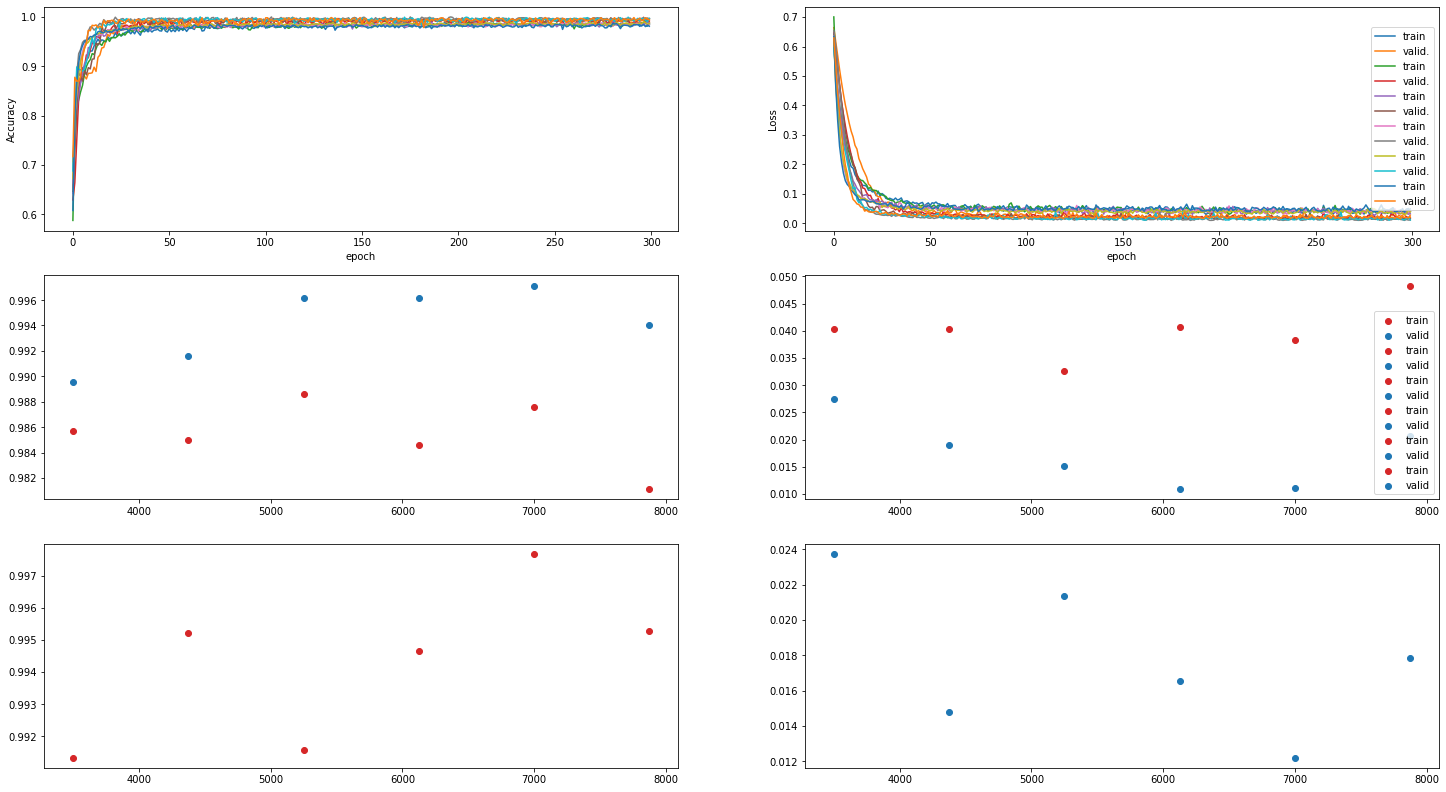

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(25,14))
ax[0,0].set_xlabel('epoch'); ax[0,0].set_ylabel("Accuracy")
ax[0,1].set_xlabel('epoch'); ax[0,1].set_ylabel("Loss"); 

for acc,val,dim in zip(tr_acc_inc, val_acc_inc, m_train_inc):
    ax[0,0].plot(acc,label="train")
    ax[0,0].plot(val,label="valid.")
    
    ax[1,0].scatter(dim,acc[-1],label="train",color='tab:red')
    ax[1,0].scatter(dim,val[-1],label="valid",color='tab:blue')


for acc,val,dim in zip(tr_loss_inc, val_loss_inc, m_train_inc):
    ax[0,1].plot(acc,label="train")
    ax[0,1].plot(val,label="valid.")
    
    ax[1,1].scatter(dim,acc[-1],label="train", color='tab:red')
    ax[1,1].scatter(dim,val[-1],label="valid", color='tab:blue')

for acc,val,dim in zip(test_acc_inc, test_loss_inc,(m_train_inc)):
    ax[2,0].scatter(dim,acc,label="test_acc", color='tab:red')
    ax[2,1].scatter(dim,val,label="test_loss", color='tab:blue')

ax[0,1].legend(loc='center right')
# ax[0,0].legend(loc='center left')
ax[1,1].legend(loc='lower right')
# ax[1,0].legend(loc='center left')
plt.show()

### 1c) augmented

In [ ]:
def traslate(x):
    '''prende 20% dei dati e li trasla. restituisce una lista con i dati traslati  '''
    trasl_data = []
    for dat in x:
        v = np.array( (np.random.random(2)-0.5)*20 ) # vettore traslazione
        trasl_data.append( dat + v )
    return trasl_data

#test della funzione simulate
N=1000
dati = np.array(create_data.sample_data(N, B))
print(len(dati))
m_i = int(0.25 * N)
dati = np.append(dati, traslate(dati[:m_i]), axis=0)
print(len(dati))
print(len(traslate(dati)))

1000
1250
1250


In [ ]:
N=5000
m_i = int(0.25 * N)
X = create_data.sample_data(N, B)

X_training,  X_test = [], []
Y_training, Y_test = [], []
X_valid, Y_valid = [], []
m_train_sim = []

mean = np.mean(X, axis=0) ; std = np.std(X, axis=0)
X_scaled = preprocess.standardize(X, mean, std)

X_training,  X_test = [], []
Y_training, Y_test = [], []
X_valid, Y_valid = [], []
m_train_sim = []

dati=X

for i in range(4):
    first, last = i*m_i , (i+1)*m_i
    trs_list = np.array(traslate(X[first:last]))
    dati = np.append(dati, trs_list, axis=0) 


for i in range(5):
    # first, last = i*m_i , (i+1)*m_i
    dim = N + i*m_i
    # trs_list = np.array(traslate(X[first:last]))
    # X = np.append(X,trs_list, axis=0)

    X = dati[0:dim]
    perm = np.random.permutation(len(X)); X = X[perm] #random permutation
    
    mean = np.mean(dati[0:dim], axis=0) ; std = np.std(dati[0:dim], axis=0)
    X = preprocess.standardize(X, mean, std)

    # N = len(X)
    N_train = int(dim*train_frac)
    N_valid = int(N_train*0.3)
    m_train_sim.append(N_train)
   
    X_training.append((X_scaled[N_valid:N_train]) )
    Y_training.append( create_data.assign_label(X[N_valid:N_train]) )

    X_test.append((X_scaled[N_train:]) )
    Y_test.append(create_data.assign_label(X[N_train:]) )

    X_valid.append(X_scaled[0:N_valid]) 
    Y_valid.append(create_data.assign_label(X[0:N_valid])) 

    #print(f'la dim totale: {dim}')
    #print(f'training size {len(X_training[i])}, {len(Y_training[i])}')
    #print(f'val {len(X_valid[i])},{len(Y_valid[i])}')
    #print(f'test {len(X_test[i])},{len(Y_test[i])}')

print(m_train_sim)



[3500, 4375, 5250, 6125, 7000]


In [ ]:
# def simulate(x):
#     '''funzione che simula i dati
#     prende in ingresso i dati in un np.array(!), prende i primi 20% dei dati e poi li trasla'''
    
#     permutation1 = np.random.permutation(len(x)) # random permutation
#     x = x[permutation1]
#     # x_scaled = preprocess.standardize(x, mean, std)

#     trasl_data=[]
#     m = int(len(x) * 0.2) #20 percento dei dati
#     for dat in x[:m]:
#         v = np.array( (np.random.random(2)-0.5)*20 ) # vettore traslazione
#         trasl_data.append( dat + v )

#     trasl_data = np.array(trasl_data)
#     data = np.concatenate((x, trasl_data))
#     # permutation2 = np.random.permutation(len(data)) # random permutation
#     # data = data[permutation2]
#     return data

In [ ]:
tr_acc_sim, val_acc_sim = [], []
tr_loss_sim, val_loss_sim = [], []
test_loss_sim, test_acc_sim = [], []

for x_tr, y_tr, x_val, y_val, x_ts, y_ts in zip(X_training, Y_training, X_valid, Y_valid, X_test, Y_test):

    network = nn_model.NN(
    input_dim         = input_dim,
    architecture      = architecture,
    dropout_layers    = dropout_arc,
    dropout_rates     = dropout_rates,
    batch_norm_layers = batch_norm_arc,
    hidden_activation = hidden_activation,
    output_activation = output_activation,
    nn_name           = name,
    )

    network.compile(
        loss      = loss,
        optimizer = optimizer,
        metrics   = metrics,
        )

    fit = network.fit(
        x_tr, y_tr,
        epochs          = N_epochs,
        batch_size      = minibatch,
        validation_data = (x_val, y_val),
        verbose         = 0,
    )
    
    tr_acc_sim.append(fit.history['accuracy'])
    val_acc_sim.append(fit.history['val_accuracy'])
    tr_loss_sim.append(fit.history['loss'])
    val_loss_sim.append(fit.history['val_loss'])
    
    test = network.evaluate(
        x_ts, y_ts,
        batch_size      = minibatch,
        verbose         = 0,
        )
    print(test)
    test_loss_sim.append(test[0])
    test_acc_sim.append(test[1])

[0.016151927411556244, 0.9946666955947876]
[0.013014797121286392, 0.9968000054359436]
[0.012793377973139286, 0.9991111159324646]
[0.016346381977200508, 0.9942857027053833]
[0.01659640669822693, 0.9929999709129333]


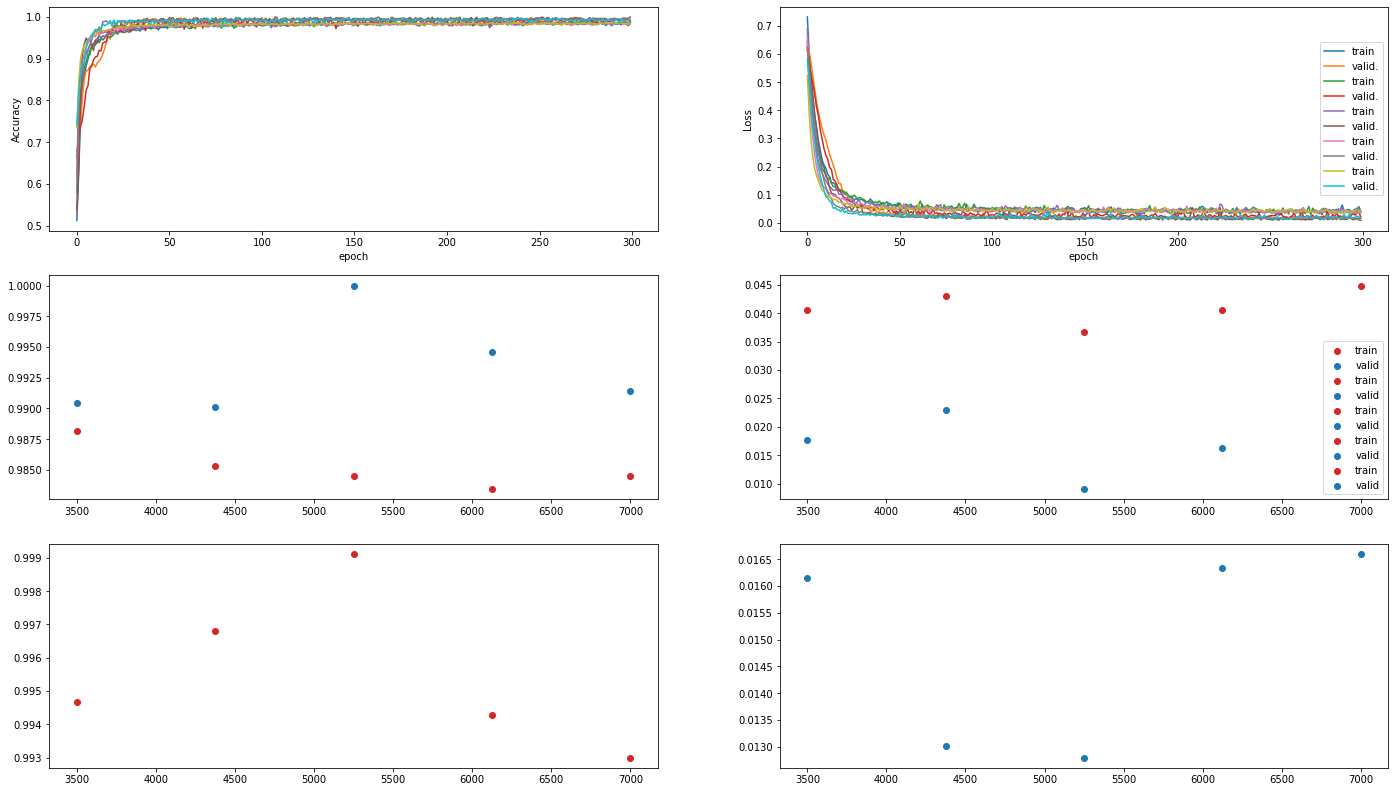

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(24,14))
ax[0,0].set_xlabel('epoch'); ax[0,0].set_ylabel("Accuracy")
ax[0,1].set_xlabel('epoch'); ax[0,1].set_ylabel("Loss"); 

for acc,val,m in zip(tr_acc_sim, val_acc_sim, m_train_sim):
    ax[0,0].plot(acc,label="train")
    ax[0,0].plot(val,label="valid.")
    
    ax[1,0].scatter(m,acc[-1],label="train",color='tab:red')
    ax[1,0].scatter(m,val[-1],label="valid",color='tab:blue')


for acc,val,m in zip(tr_loss_sim, val_loss_sim, m_train_sim):
    ax[0,1].plot(acc,label="train")
    ax[0,1].plot(val,label="valid.")
    
    ax[1,1].scatter(m,acc[-1],label="train", color='tab:red')
    ax[1,1].scatter(m,val[-1],label="valid", color='tab:blue')

for acc,val,rate in zip(test_acc_sim, test_loss_sim, m_train_sim):
    ax[2,0].scatter(rate,acc,label="test_acc", color='tab:red')
    ax[2,1].scatter(rate,val,label="test_loss", color='tab:blue')

ax[0,1].legend(loc='center right')
# ax[0,0].legend(loc='center left')
ax[1,1].legend(loc='lower right')
# ax[1,0].legend(loc='center left')
plt.show()

#incertezza(?)
#grafici con train e test increased-reduced (accuracy)
#aumentati vs simulati
per il paper:
- prendere giù i grafici: train e test increased-reduced(accuracy)
{definire i nomi delle liste e plottare nello stesso grafico}

- scrivere procedimento

## plot per il paper

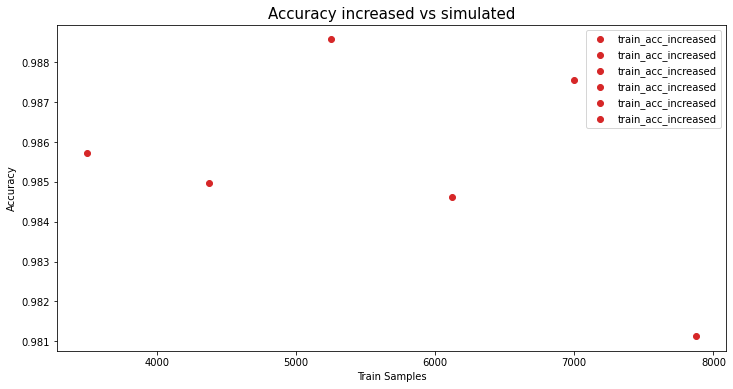

[3500, 4375, 5250, 6125, 7000, 7874]
[3500, 4375, 5250, 6125, 7000]
6
5


In [ ]:
plt.figure(figsize=(12,6))
plt.title('Accuracy increased vs simulated',fontsize=15)

inc_accuracy = [tr[-1] for tr in tr_acc_inc]
sim_accuracy = [tr[-1] for tr in tr_acc_sim]


for tr_i,  dim_i in zip(inc_accuracy, m_train_inc):
    plt.scatter(dim_i, tr_i, label="train_acc_increased", color="tab:red")
# for tr_s, dim_s in zip(sim_accuracy, m_train_sim):
#     plt.scatter(dim_s, tr_s, label="train_acc_simulate", color="tab:blue")

plt.xlabel('Train Samples')
plt.ylabel('Accuracy')
# plt.savefig()
plt.legend(bbox_to_anchor =(1, 1))
plt.show()

print(m_train_inc)
print(m_train_sim)

print(len(inc_accuracy))
print(len(sim_accuracy))

In [ ]:
ax, fig = plt.subplots(figsize=(15,6))
ax.set_title('Accuracy increased vs simulated',fontsize=15)

inc_accuracy = [tr[-1] for tr in tr_acc_inc]
sim_accuracy = [tr[-1] for tr in tr_acc_sim]

for tr_i,  dim_i in zip(inc_accuracy, m_train_inc):
    print(tr_i)
    print(dim_i)
    plt.scatter(dim_i, tr_i, label="train_acc_increased", color="tab:red")
for tr_s, dim_s in zip(sim_accuracy, m_train_sim):
    plt.scatter(dim_s, tr_s, label="train_acc_simulate", color="tab:blue")

ax.set_xlabel('Train Samples')
plt.set_ylabel('Accuracy')
# plt.savefig()
ax.legend(bbox_to_anchor =(1, 1))
plt.show()

print(m_train_inc)
print(m_train_sim)

print(len(inc_accuracy))
print(len(sim_accuracy))

NameError: name 'plt' is not defined

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=452e6836-b7b8-455e-80d9-d4109b6baddf' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>